# AIPI 590 - XAI | Assignment #07
### Description
### Your Name: Wilson Tseng

#### Assignment 7 - Explainable Deep Learning:
[GitHub Link](https://github.com/smilewilson1999/XAI/tree/2602b284ffba22ca525903d9a2dc116459786232/Assignment%207%20-%20Explainable%20Deep%20Learning)


[![Open In Collab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/smilewilson1999/XAI/blob/main/Assignment%206%20-%20Explainable%20Techniques%20II/explainable_tech_II.ipynb)

## DO:
* Use markdown and comments effectively
* Pull out classes and functions into scripts 
* Ensure cells are executed in order and avoid skipping cells to maintain reproducibility
* Choose the appropriate runtime (i.e. GPU) if needed
* If you are using a dataset that is too large to put in your GitHub repository, you must either pull it in via Hugging Face Datasets or put it in an S3 bucket and use boto3 to pull from there. 
* Use versioning on all installs (ie pandas==1.3.0) to ensure consistency across versions
* Implement error handling where appropriate

## DON'T:
* Absolutely NO sending us Google Drive links or zip files with data (see above).
* Load packages throughout the notebook. Please load all packages in the first code cell in your notebook.
* Add API keys or tokens directly to your notebook!!!! EVER!!!
* Include cells that you used for testing or debugging. Delete these before submission
* Have errors rendered in your notebook. Fix errors prior to submission.

In [1]:
# Please use this to connect your GitHub repository to your Google Colab notebook
# Connects to any needed files from GitHub and Google Drive
import os

# Remove Colab default sample_data
!rm -r ./sample_data

# Clone GitHub files to colab workspace
repo_name = "XAI" # Change to your repo name
git_path = 'https://github.com/smilewilson1999/XAI.git' #Change to your path
!git clone "{git_path}"

# Install dependencies from requirements.txt file
#!pip install -r "{os.path.join(repo_name,'requirements.txt')}" #Add if using requirements.txt

# Change working directory to location of notebook
notebook_dir = 'Assignment 7 - Explainable Deep Learning'
path_to_notebook = os.path.join(repo_name, notebook_dir)
%cd "{path_to_notebook}"
%ls

rm: ./sample_data: No such file or directory
Cloning into 'XAI'...
remote: Enumerating objects: 92, done.
remote: Counting objects: 100% (92/92), done.
remote: Compressing objects: 100% (72/72), done.
remote: Total 92 (delta 41), reused 66 (delta 18), pack-reused 0 (from 0)
Receiving objects: 100% (92/92), 23.71 MiB | 12.41 MiB/s, done.
Resolving deltas: 100% (41/41), done.
/Users/wilson/Desktop/Duke Course/XAI/Assignment 7 - Explainable Deep Learning/XAI/Assignment 7 - Explainable Deep Learning
Duke AI XAI template.ipynb


#### Using environment variables in Google Colab

In Google Colab, locate the key button on the left side of the screen. You can enter in any environment variables or API keys here and they will remain private.

Then add the environment variables to your notebook using the code below.

Make sure to document in your notebook if you are using API keys and how to get them (ie share a link for documentation to get a Hugging Face API Key if you are using Hugging Face)

In [21]:
!pip3 install captum pyodbc==4.0.30 tcav torchvision tensorflow

INFO: pip is looking at multiple versions of tensorflow to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 9.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached rsa-4.9-py3-none-any.whl.metadata (4.2 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 230.1/230.1 MB 12.6 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.0/11.0 MB 14.1 MB/s eta 0:00:00 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.5/26.5 MB 14.0 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.1/18.1 MB 13.5 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 13.7 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 12.4 MB/s

## Hypothesis

H0: The ResNet model does not show a significant difference in its ability to learn the concept of "airplane" compared to "car".

H1: The ResNet model shows a significant difference in its ability to learn the concept of "airplane" compared to "car".

In [13]:
import torch
import torchvision.models as models
import torchvision.transforms as transforms
import torchvision.datasets as datasets
from torch.utils.data import DataLoader


# Load pre-trained ResNet18 model
model = models.resnet18(pretrained=True)
model.eval()  # 設置模型為評估模式 Set model to evaluation mode

# Data preprocessing and loading CIFAR-10 dataset
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalization 
])

# Load CIFAR-10 test dataset [cited from ChatGPT4o to let me know this useful dataset]
dataset = datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)

# Check if the dataset is correctly loaded
data_iter = iter(dataloader)
images, labels = next(data_iter)


print(f"Images batch shape: {images.size()}")  # Display image batch size
print(f"Labels batch shape: {labels.size()}")  # Display label batch size


Files already downloaded and verified
Images batch shape: torch.Size([32, 3, 224, 224])
Labels batch shape: torch.Size([32])


## Example

[cited from GPT4o for helping me trial and error]

In [25]:
# CIFAR-10 label map
label_map = {0: "airplane", 1: "automobile", 2: "bird", 3: "cat", 4: "deer",
             5: "dog", 6: "frog", 7: "horse", 8: "ship", 9: "truck"}

# Check the labels in the batch
for i in range(len(labels)):
    print(f"Image {i} label: {label_map[labels[i].item()]}")

# Filter our targeted data - 'airplane' and 'automobile'
airplane_or_car_indices = [i for i in range(len(labels)) if labels[i].item() in [0, 1]]
filtered_images = images[airplane_or_car_indices]
filtered_labels = labels[airplane_or_car_indices]

# print(f"Filtered images shape: {filtered_images.shape}")

Image 0 label: cat
Image 1 label: truck
Image 2 label: cat
Image 3 label: truck
Image 4 label: frog
Image 5 label: deer
Image 6 label: deer
Image 7 label: cat
Image 8 label: ship
Image 9 label: automobile
Image 10 label: automobile
Image 11 label: dog
Image 12 label: deer
Image 13 label: dog
Image 14 label: truck
Image 15 label: frog
Image 16 label: airplane
Image 17 label: frog
Image 18 label: automobile
Image 19 label: horse
Image 20 label: cat
Image 21 label: ship
Image 22 label: frog
Image 23 label: airplane
Image 24 label: bird
Image 25 label: ship
Image 26 label: automobile
Image 27 label: airplane
Image 28 label: ship
Image 29 label: frog
Image 30 label: truck
Image 31 label: frog


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


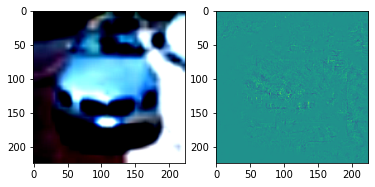

In [27]:
from captum.attr import IntegratedGradients
import matplotlib.pyplot as plt
import numpy as np

# Use Integrated Gradients
ig = IntegratedGradients(model)

# Use the filtered images for explanation
input_image = filtered_images[0].unsqueeze(0)  # Take the first image as an example

# Compute integrated gradients
attributions, delta = ig.attribute(input_image, target=filtered_labels[0].item(), return_convergence_delta=True)

# Convert the attributions from multi-channel to single-channel by averaging the RGB channels [cited from ChatGPT4o to debug]
attributions = attributions.squeeze().mean(dim=0).detach().cpu().numpy()

# Normalize the gradients to enhance visibility [cited from ChatGPT4o to debug] p.s. the original one is too dark
attributions = (attributions - attributions.min()) / (attributions.max() - attributions.min())

# Use a heatmap to visualize the gradients
fig, ax = plt.subplots(1, 2)
ax[0].imshow(filtered_images[0].permute(1, 2, 0))  # The original image
# ax[1].imshow(attributions, cmap='hot')  # Show gradients with heatmap
# ax[1].imshow(attributions, cmap='inferno') # Show gradients with heatmap
ax[1].imshow(attributions, cmap='viridis') # Show gradients with heatmap
plt.show()


## My turn and analysis

In [42]:
# # CIFAR-10 label map
# label_map = {0: "airplane", 1: "automobile", 2: "bird", 3: "cat", 4: "deer",
#              5: "dog", 6: "frog", 7: "horse", 8: "ship", 9: "truck"}

# Select 'airplane' and 'automobile' images
airplane_index = [i for i, label in enumerate(labels) if label == 0]  # The label for "airplane" is 0.
car_index = [i for i, label in enumerate(labels) if label == 1]  # The label for "automobile" is 1.

# Take one airplane and one car image
airplane_image = images[airplane_index[0]].unsqueeze(0)
car_image = images[car_index[0]].unsqueeze(0)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


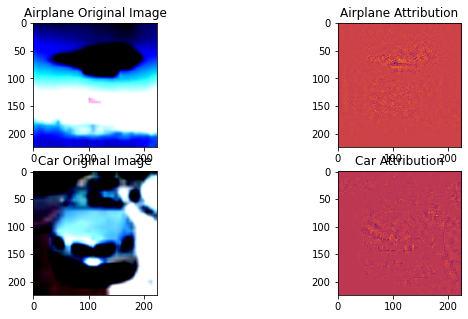

In [43]:
# Perform explanation on 'airplane'
attributions_airplane, _ = ig.attribute(airplane_image, target=0, return_convergence_delta=True)

# Perform explanation on 'automobile'
attributions_car, _ = ig.attribute(car_image, target=1, return_convergence_delta=True)

# Normalize and convert to single-channel
attributions_airplane = attributions_airplane.squeeze().mean(dim=0).detach().cpu().numpy()
attributions_car = attributions_car.squeeze().mean(dim=0).detach().cpu().numpy()

attributions_airplane = (attributions_airplane - attributions_airplane.min()) / (attributions_airplane.max() - attributions_airplane.min())
attributions_car = (attributions_car - attributions_car.min()) / (attributions_car.max() - attributions_car.min())

# Visualize the results
fig, ax = plt.subplots(2, 2, figsize=(10, 5))
ax[0, 0].imshow(airplane_image.squeeze().permute(1, 2, 0).cpu().numpy())
ax[0, 0].set_title("Airplane Original Image")
ax[0, 1].imshow(attributions_airplane, cmap='inferno') # Show gradients with heatmap
ax[0, 1].set_title("Airplane Attribution")

ax[1, 0].imshow(car_image.squeeze().permute(1, 2, 0).cpu().numpy())
ax[1, 0].set_title("Car Original Image")
ax[1, 1].imshow(attributions_car, cmap='inferno') # Show gradients with heatmap
ax[1, 1].set_title("Car Attribution")
plt.show()

Left: Original image of the airplane / Right: Integrated Gradients plot (represents the model's focus to the certain place)

We can tell the model focuses more on certain areas, but the overall color change is not significant, it may indicate that the model's learning effect on this airplane image is not that obvious.

Left: Original image of the car / Right: Integrated Gradients plot

The gradient map of the car also shows some key areas (the front of the car or the headstock), but the overall distribution is relatively even, which implies that the model also learns specific areas of the car image.

In [ ]:
from tcav.tcav import TCAV
from tcav.activation_generator import ActivationGenerator
from tcav.cav import CAV
import tcav.utils as utils

# Path for concept images and random images
concept_dir = "./Assignment 7 - Explainable Deep Learning/concept_images""
random_dir = "./random_images"

# Create ActivationGenerator and CAV objects
act_generator = ActivationGenerator(model, dataset)

# Define the concepts and random concepts
concepts = ["airplane_wings_different_angles", "car_headlights"]
random_concepts = ["random_images"]

# Test TCAV for each concept
for concept in concepts:
    cav = CAV(concept, random_dir, model)
    tcav = TCAV(target='airplane', cav=cav, bottleneck='layer4')
    tcav_results = tcav.run()

    print(f"Results for {concept}:")
    print(tcav_results)
